In [152]:
import plotly.express as px
import hvplot.pandas
import pandas as pd
import json
from pathlib import Path
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import chart_studio.plotly as py

In [153]:
# Extract token
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Set token using Plotly Express set function
px.set_mapbox_access_token(mapbox_token)

In [2]:
#brewiers and alochol dataset
breweries = pd.read_csv(Path('../data/breweries.csv'))
wineries = pd.read_csv(Path('../data/Wineries__Breweries__and_Distilleries.csv'))

In [ ]:
liquor_estasblishments = pd.read_csv(Path('../data/Liquor_Authority_Quarterly_List_of_Active_Licenses.csv')) 
breweries_geocode = pd.read_csv(Path('../data/breweries_geocode.csv'))

In [ ]:
#dog dataset
dog_licenses = pd.read_csv(Path('../data/NYC_Dog_Licensing_Dataset.csv'))
dog_runs = pd.read_csv(Path('../data/nyc-parks-dog-runs-1.csv'))

In [97]:
#zip_code_data
zipcode_data = pd.read_csv(Path('../data/uszips.csv'))

#income by zipcode by year
income_2011 = pd.read_csv(Path('../data/2011_income_by_zipcode.csv'))
income_2012 = pd.read_csv(Path('../data/2012_income_by_zipcode.csv'))
income_2013 = pd.read_csv(Path('../data/2013_income_by_zipcode.csv'))
income_2014 = pd.read_csv(Path('../data/2014_income_by_zipcode.csv'))
income_2015 = pd.read_csv(Path('../data/2015_income_by_zipcode.csv'))
income_2016 = pd.read_csv(Path('../data/2016_income_by_zipcode.csv'))

In [105]:
#zicode_long_at
longlag = pd.read_csv(Path('../data/us-zip-code-latitude-and-longitude.csv'), sep=';')

In [106]:
income_2011.head()

,ZIP code,Size of adjusted gross income,Number of returns
0,0.0,Total,"9,224,775"
1,0.0,"$1 under $25,000",3702630
2,0.0,"$25,000 under $50,000",2124251
3,0.0,"$50,000 under $75,000",1219598
4,0.0,"$75,000 under $100,000",766320


In [120]:
longlag.head()

,Zip code,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,14043,Depew,NY,42.904958,-78.700600,-5,1,"42.904958,-78.7006"
1,13827,Owego,NY,42.120274,-76.258740,-5,1,"42.120274,-76.25874"
2,14739,Friendship,NY,42.192384,-78.143080,-5,1,"42.192384,-78.14308"
3,11703,North Babylon,NY,40.733398,-73.322570,-5,1,"40.733398,-73.32257"
4,11707,West Babylon,NY,40.922326,-72.637078,-5,1,"40.922326,-72.637078"


In [119]:
longlag.rename(columns={'Zip':'Zip code'}, inplace=True)

In [5]:
list(income_2011.columns)

['ZIP\ncode', 'Size of adjusted gross income', 'Number of returns']

In [6]:
income_2011.dtypes

ZIP\ncode                        float64
Size of adjusted gross income     object
Number of returns                 object
dtype: object

In [7]:
#income_2011['ZIP code'][50]

income_2011.loc[income_2011['ZIP\ncode'] == 10010]

,ZIP code,Size of adjusted gross income,Number of returns
72,10010.0,NaN,"17,488"
73,10010.0,"$1 under $25,000",3360
74,10010.0,"$25,000 under $50,000",2970
75,10010.0,"$50,000 under $75,000",2631
76,10010.0,"$75,000 under $100,000",1926
77,10010.0,"$100,000 under $200,000",3475
78,10010.0,"$200,000 or more",3126


In [8]:
income_2011.columns = ['Zip code', 'Size of adjusted gross income', 'Number of returns']

In [9]:
income_2011.head()

,Zip code,Size of adjusted gross income,Number of returns
0,0.0,Total,"9,224,775"
1,0.0,"$1 under $25,000",3702630
2,0.0,"$25,000 under $50,000",2124251
3,0.0,"$50,000 under $75,000",1219598
4,0.0,"$75,000 under $100,000",766320


In [10]:
income_2011.loc[income_2011['Zip code'] == 10001]

,Zip code,Size of adjusted gross income,Number of returns
8,10001.0,NaN,"13,590"
9,10001.0,"$1 under $25,000",4329
10,10001.0,"$25,000 under $50,000",2659
11,10001.0,"$50,000 under $75,000",1875
12,10001.0,"$75,000 under $100,000",1241
13,10001.0,"$100,000 under $200,000",1921
14,10001.0,"$200,000 or more",1565


In [11]:
income_2011 = income_2011.dropna()
income_2011 = income_2011.astype({"Zip code": int})
income_2011 = income_2011.loc[income_2011['Zip code'] != 0]
income_2011 = income_2011.loc[income_2011['Zip code'] != 99999]

In [12]:
income_2011.loc[income_2011["Number of returns"] == '**', 'Number of returns'] = 0
income_2011 = income_2011.astype({"Number of returns": int})

In [13]:
income_2011.head()

,Zip code,Size of adjusted gross income,Number of returns
9,10001,"$1 under $25,000",4329
10,10001,"$25,000 under $50,000",2659
11,10001,"$50,000 under $75,000",1875
12,10001,"$75,000 under $100,000",1241
13,10001,"$100,000 under $200,000",1921


In [14]:
income_2012.columns = ['Zip code', 'Size of adjusted gross income', 'Number of returns']
income_2012 = income_2012.dropna()
income_2012 = income_2012.astype({"Zip code": int})
income_2012 = income_2012.loc[income_2012['Zip code'] != 0]
income_2012 = income_2012.loc[income_2012['Zip code'] != 99999]

In [15]:
income_2012.loc[income_2012["Number of returns"] == '**', 'Number of returns'] = 0
income_2012 = income_2012.astype({"Number of returns": int})

In [16]:
income_2012.head()

,Zip code,Size of adjusted gross income,Number of returns
9,10001,"$1 under $25,000",4080
10,10001,"$25,000 under $50,000",2520
11,10001,"$50,000 under $75,000",1790
12,10001,"$75,000 under $100,000",1230
13,10001,"$100,000 under $200,000",2030


In [17]:
income_2013.columns = ['Zip code', 'Size of adjusted gross income', 'Number of returns']
income_2013 = income_2013.dropna()
income_2013 = income_2013.astype({"Zip code": int})
income_2013 = income_2013.loc[income_2013['Zip code'] != 0]
income_2013 = income_2013.loc[income_2013['Zip code'] != 99999]

In [18]:
income_2013.loc[income_2013["Number of returns"] == '**', 'Number of returns'] = 0
income_2013 = income_2013.astype({"Number of returns": int})

In [19]:
income_2014.columns = ['Zip code', 'Size of adjusted gross income', 'Number of returns']
income_2014 = income_2014.dropna()
income_2014 = income_2014.astype({"Zip code": int})
income_2014 = income_2014.loc[income_2014['Zip code'] != 0]
income_2014 = income_2014.loc[income_2014['Zip code'] != 99999]

In [20]:
income_2014.loc[income_2014["Number of returns"] == '**', 'Number of returns'] = 0
income_2014 = income_2014.astype({"Number of returns": int})

In [21]:
income_2015.columns = ['Zip code', 'Size of adjusted gross income', 'Number of returns']
income_2015 = income_2015.dropna()
income_2015 = income_2015.astype({"Zip code": int})
income_2015 = income_2015.loc[income_2015['Zip code'] != 0]
income_2015 = income_2015.loc[income_2015['Zip code'] != 99999]

In [22]:
income_2015.loc[income_2015["Number of returns"] == '**', 'Number of returns'] = 0
income_2015 = income_2015.astype({"Number of returns": int})

In [23]:
income_2016.columns = ['Zip code', 'Size of adjusted gross income', 'Number of returns']
income_2016 = income_2016.dropna()
income_2016 = income_2016.astype({"Zip code": int})
income_2016 = income_2016.loc[income_2016['Zip code'] != 0]
income_2016 = income_2016.loc[income_2016['Zip code'] != 99999]

In [24]:
income_2016.loc[income_2016["Number of returns"] == '**', 'Number of returns'] = 0
income_2016 = income_2016.astype({"Number of returns": int})

In [ ]:
dog_licenses.head()

In [ ]:
dog_runs.head()

In [ ]:
#px.parallel_coordinates(dog_licenses, color='ZipCode')

In [ ]:
dog_licenses.columns

In [ ]:
dogs = pd.DataFrame(dog_licenses, columns = ['AnimalName', 'AnimalGender', 'BreedName','ZipCode'])
dogs = dogs.astype({"ZipCode": str})
dogs.sort_values(by=['ZipCode'])

In [ ]:
dogs.head()

In [ ]:
dog_runs.columns

In [ ]:
dogruns = pd.DataFrame(dog_runs, columns = ['NAME', 'DOG_AREA_T', 'ZIPCODE'])

In [ ]:
dogruns.head()

In [ ]:
breweries.head()

In [ ]:
breweries = breweries.loc[breweries['state'] == 'New York']

In [ ]:
breweries

In [ ]:
ny_breweries = pd.DataFrame(breweries, columns=['name', 'code'])
ny_breweries.head()

In [ ]:
liquor_estasblishments.head()

In [ ]:
liquor_estasblishments.columns

In [ ]:
ny_liquor = pd.DataFrame(liquor_estasblishments, columns=['Premises Name', 'License Type Name', 'Zip'])
ny_liquor.head()

In [ ]:
wineries.tail()

In [ ]:
wineries.columns

In [ ]:
ny_wineries = pd.DataFrame(wineries, columns=['Premises Name', 'License Type Name', 'Zip'])
ny_wineries.head()

In [ ]:
#ic_2011 = px.scatter(income_2011, x="Zip code", y="Number of returns", color="Size of adjusted gross income")
#layout = go.Layout(xaxis={'type': 'category'})
#fig = go.Figure(ic_2011, layout)

#py.iplot(ic_2011, filename='pandas-multiple-scatter')

#py.iplot(fig)


#data = [trace]
#layout = go.Layout(xaxis={'type': 'category'})
#fig = go.Figure(data, layout)

#layout = go.Layout(xaxis=dict(type='category'))
#fig = go.Figure(data=ic_2011, layout=layout)
#iplot(fig)
#ic_2011

#layout = go.Layout(xaxis={'type': 'category'})
#fig = go.Figure(data, layout)

In [ ]:
px.scatter(income_2011, x="Zip code", y="Number of returns", color="Size of adjusted gross income")

In [ ]:
dg = dogruns.groupby('ZIPCODE').count()

In [ ]:
dg.head()

In [ ]:
dogs.groupby('ZipCode').count()

In [25]:
income_2011.dtypes

Zip code                          int32
Size of adjusted gross income    object
Number of returns                 int32
dtype: object

In [26]:
column_appended_data = pd.concat([income_2011, income_2012['Number of returns'], income_2013['Number of returns'], income_2014['Number of returns'], income_2015['Number of returns'], income_2016['Number of returns']], axis="columns", join="inner")
column_appended_data.head()

,Zip code,Size of adjusted gross income,Number of returns,Number of returns,Number of returns,Number of returns,Number of returns,Number of returns
9,10001,"$1 under $25,000",4329,4080,4140,3880,3760,3740
10,10001,"$25,000 under $50,000",2659,2520,2480,2530,2430,2500
11,10001,"$50,000 under $75,000",1875,1790,1820,1850,1930,1950
12,10001,"$75,000 under $100,000",1241,1230,1300,1300,1340,1410
13,10001,"$100,000 under $200,000",1921,2030,2080,2350,2480,2580


In [27]:
column_appended_data.columns = ['Zip code', 'Size of adjusted gross income', '2011', '2012', '2013', '2014', '2015', '2016']

In [56]:
column_appended_data.head(10)

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016
9,10001,"$1 under $25,000",4329,4080,4140,3880,3760,3740
10,10001,"$25,000 under $50,000",2659,2520,2480,2530,2430,2500
11,10001,"$50,000 under $75,000",1875,1790,1820,1850,1930,1950
12,10001,"$75,000 under $100,000",1241,1230,1300,1300,1340,1410
13,10001,"$100,000 under $200,000",1921,2030,2080,2350,2480,2580
14,10001,"$200,000 or more",1565,1650,1900,2170,2370,2340
17,10002,"$1 under $25,000",25950,24980,24180,23350,22380,21180
18,10002,"$25,000 under $50,000",8925,8280,8440,8270,8260,8210
19,10002,"$50,000 under $75,000",4008,4160,4360,4500,4690,4810
20,10002,"$75,000 under $100,000",2126,2260,2330,2510,2690,2710


In [85]:
column_appended_data['Size of adjusted gross income'].head()

9            $1 under $25,000
10      $25,000 under $50,000
11      $50,000 under $75,000
12     $75,000 under $100,000
13    $100,000 under $200,000
Name: Size of adjusted gross income, dtype: object

In [65]:
rich = column_appended_data.loc[column_appended_data['Size of adjusted gross income'] == '$200,000 or more']
rich.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016
14,10001,"$200,000 or more",1565,1650,1900,2170,2370,2340
22,10002,"$200,000 or more",1087,1190,1310,1540,1640,1650
30,10003,"$200,000 or more",5005,5140,5530,6150,6450,6280
38,10004,"$200,000 or more",698,780,830,870,880,850
46,10005,"$200,000 or more",1359,1460,1530,1620,1730,1620


In [121]:
rich = pd.merge(rich, longlag, on=['Zip code'])

In [122]:
rich2011 = rich.sort_values(["2011"], ascending=False) 
rich2011.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,10023,"$200,000 or more",8115,8460,8690,9410,9820,9620,New York,NY,40.776099,-73.98285,-5,1,"40.776099,-73.98285"
1,10024,"$200,000 or more",7026,7380,7750,8400,8590,8570,New York,NY,40.786387,-73.97709,-5,1,"40.786387,-73.97709"
2,10128,"$200,000 or more",6299,6570,6770,7350,7740,7740,New York,NY,40.781894,-73.95039,-5,1,"40.781894,-73.95039"
3,10021,"$200,000 or more",5935,6260,6410,6810,7000,6910,New York,NY,40.768420,-73.96045,-5,1,"40.76842,-73.96045"
4,10025,"$200,000 or more",5841,6140,6450,7090,7460,7470,New York,NY,40.798502,-73.96811,-5,1,"40.798502,-73.96811"


In [123]:
rich2012 = rich.sort_values(["2012"], ascending=False) 
rich2012.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,10023,"$200,000 or more",8115,8460,8690,9410,9820,9620,New York,NY,40.776099,-73.98285,-5,1,"40.776099,-73.98285"
1,10024,"$200,000 or more",7026,7380,7750,8400,8590,8570,New York,NY,40.786387,-73.97709,-5,1,"40.786387,-73.97709"
2,10128,"$200,000 or more",6299,6570,6770,7350,7740,7740,New York,NY,40.781894,-73.95039,-5,1,"40.781894,-73.95039"
3,10021,"$200,000 or more",5935,6260,6410,6810,7000,6910,New York,NY,40.768420,-73.96045,-5,1,"40.76842,-73.96045"
5,10011,"$200,000 or more",5801,6150,6580,7140,7540,7470,New York,NY,40.741012,-74.00012,-5,1,"40.741012,-74.00012"


In [124]:
rich2013 = rich.sort_values(["2013"], ascending=False) 
rich2013.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,10023,"$200,000 or more",8115,8460,8690,9410,9820,9620,New York,NY,40.776099,-73.98285,-5,1,"40.776099,-73.98285"
1,10024,"$200,000 or more",7026,7380,7750,8400,8590,8570,New York,NY,40.786387,-73.97709,-5,1,"40.786387,-73.97709"
2,10128,"$200,000 or more",6299,6570,6770,7350,7740,7740,New York,NY,40.781894,-73.95039,-5,1,"40.781894,-73.95039"
5,10011,"$200,000 or more",5801,6150,6580,7140,7540,7470,New York,NY,40.741012,-74.00012,-5,1,"40.741012,-74.00012"
4,10025,"$200,000 or more",5841,6140,6450,7090,7460,7470,New York,NY,40.798502,-73.96811,-5,1,"40.798502,-73.96811"


In [125]:
rich2014 = rich.sort_values(["2014"], ascending=False) 
rich2014.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,10023,"$200,000 or more",8115,8460,8690,9410,9820,9620,New York,NY,40.776099,-73.98285,-5,1,"40.776099,-73.98285"
1,10024,"$200,000 or more",7026,7380,7750,8400,8590,8570,New York,NY,40.786387,-73.97709,-5,1,"40.786387,-73.97709"
2,10128,"$200,000 or more",6299,6570,6770,7350,7740,7740,New York,NY,40.781894,-73.95039,-5,1,"40.781894,-73.95039"
5,10011,"$200,000 or more",5801,6150,6580,7140,7540,7470,New York,NY,40.741012,-74.00012,-5,1,"40.741012,-74.00012"
4,10025,"$200,000 or more",5841,6140,6450,7090,7460,7470,New York,NY,40.798502,-73.96811,-5,1,"40.798502,-73.96811"


In [126]:
rich2015 = rich.sort_values(["2015"], ascending=False) 
rich2015.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,10023,"$200,000 or more",8115,8460,8690,9410,9820,9620,New York,NY,40.776099,-73.98285,-5,1,"40.776099,-73.98285"
1,10024,"$200,000 or more",7026,7380,7750,8400,8590,8570,New York,NY,40.786387,-73.97709,-5,1,"40.786387,-73.97709"
2,10128,"$200,000 or more",6299,6570,6770,7350,7740,7740,New York,NY,40.781894,-73.95039,-5,1,"40.781894,-73.95039"
5,10011,"$200,000 or more",5801,6150,6580,7140,7540,7470,New York,NY,40.741012,-74.00012,-5,1,"40.741012,-74.00012"
4,10025,"$200,000 or more",5841,6140,6450,7090,7460,7470,New York,NY,40.798502,-73.96811,-5,1,"40.798502,-73.96811"


In [127]:
rich2016 = rich.sort_values(["2016"], ascending=False) 
rich2016.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,10023,"$200,000 or more",8115,8460,8690,9410,9820,9620,New York,NY,40.776099,-73.98285,-5,1,"40.776099,-73.98285"
1,10024,"$200,000 or more",7026,7380,7750,8400,8590,8570,New York,NY,40.786387,-73.97709,-5,1,"40.786387,-73.97709"
2,10128,"$200,000 or more",6299,6570,6770,7350,7740,7740,New York,NY,40.781894,-73.95039,-5,1,"40.781894,-73.95039"
4,10025,"$200,000 or more",5841,6140,6450,7090,7460,7470,New York,NY,40.798502,-73.96811,-5,1,"40.798502,-73.96811"
5,10011,"$200,000 or more",5801,6150,6580,7140,7540,7470,New York,NY,40.741012,-74.00012,-5,1,"40.741012,-74.00012"


In [137]:
poor = column_appended_data.loc[column_appended_data['Size of adjusted gross income'] == '$1 under $25,000']
poor = pd.merge(poor, longlag, on=['Zip code'])
poor.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,10001,"$1 under $25,000",4329,4080,4140,3880,3760,3740,New York,NY,40.750742,-73.99653,-5,1,"40.750742,-73.99653"
1,10002,"$1 under $25,000",25950,24980,24180,23350,22380,21180,New York,NY,40.717040,-73.98700,-5,1,"40.71704,-73.987"
2,10003,"$1 under $25,000",6733,6080,5740,5380,5320,5030,New York,NY,40.732509,-73.98935,-5,1,"40.732509,-73.98935"
3,10005,"$1 under $25,000",908,780,800,720,750,690,New York,NY,40.706019,-74.00858,-5,1,"40.706019,-74.00858"
4,10006,"$1 under $25,000",404,360,360,290,300,310,New York,NY,40.707904,-74.01342,-5,1,"40.707904,-74.01342"


In [138]:
poor2011 = poor.sort_values(["2011"], ascending=False) 
poor2011.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
241,11220,"$1 under $25,000",33944,35850,36670,37080,37090,36120,Brooklyn,NY,40.641436,-74.01574,-5,1,"40.641436,-74.01574"
261,11355,"$1 under $25,000",29871,31240,32710,33920,34930,34950,Flushing,NY,40.749463,-73.81941,-5,1,"40.749463,-73.81941"
277,11373,"$1 under $25,000",27998,28960,28220,28720,28340,27380,Elmhurst,NY,40.736076,-73.87804,-5,1,"40.736076,-73.87804"
273,11368,"$1 under $25,000",26666,30470,28540,29250,28810,27870,Corona,NY,40.747106,-73.85838,-5,1,"40.747106,-73.85838"
1,10002,"$1 under $25,000",25950,24980,24180,23350,22380,21180,New York,NY,40.717040,-73.98700,-5,1,"40.71704,-73.987"


In [139]:
poor2012 = poor.sort_values(["2012"], ascending=False) 
poor2012.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
241,11220,"$1 under $25,000",33944,35850,36670,37080,37090,36120,Brooklyn,NY,40.641436,-74.01574,-5,1,"40.641436,-74.01574"
261,11355,"$1 under $25,000",29871,31240,32710,33920,34930,34950,Flushing,NY,40.749463,-73.81941,-5,1,"40.749463,-73.81941"
273,11368,"$1 under $25,000",26666,30470,28540,29250,28810,27870,Corona,NY,40.747106,-73.85838,-5,1,"40.747106,-73.85838"
277,11373,"$1 under $25,000",27998,28960,28220,28720,28340,27380,Elmhurst,NY,40.736076,-73.87804,-5,1,"40.736076,-73.87804"
247,11226,"$1 under $25,000",25713,25610,25880,25840,24700,23360,Brooklyn,NY,40.645256,-73.95553,-5,1,"40.645256,-73.95553"


In [140]:
poor2013 = poor.sort_values(["2013"], ascending=False) 
poor2013.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
241,11220,"$1 under $25,000",33944,35850,36670,37080,37090,36120,Brooklyn,NY,40.641436,-74.01574,-5,1,"40.641436,-74.01574"
261,11355,"$1 under $25,000",29871,31240,32710,33920,34930,34950,Flushing,NY,40.749463,-73.81941,-5,1,"40.749463,-73.81941"
273,11368,"$1 under $25,000",26666,30470,28540,29250,28810,27870,Corona,NY,40.747106,-73.85838,-5,1,"40.747106,-73.85838"
277,11373,"$1 under $25,000",27998,28960,28220,28720,28340,27380,Elmhurst,NY,40.736076,-73.87804,-5,1,"40.736076,-73.87804"
247,11226,"$1 under $25,000",25713,25610,25880,25840,24700,23360,Brooklyn,NY,40.645256,-73.95553,-5,1,"40.645256,-73.95553"


In [141]:
poor2014 = poor.sort_values(["2014"], ascending=False) 
poor2014.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
241,11220,"$1 under $25,000",33944,35850,36670,37080,37090,36120,Brooklyn,NY,40.641436,-74.01574,-5,1,"40.641436,-74.01574"
261,11355,"$1 under $25,000",29871,31240,32710,33920,34930,34950,Flushing,NY,40.749463,-73.81941,-5,1,"40.749463,-73.81941"
273,11368,"$1 under $25,000",26666,30470,28540,29250,28810,27870,Corona,NY,40.747106,-73.85838,-5,1,"40.747106,-73.85838"
277,11373,"$1 under $25,000",27998,28960,28220,28720,28340,27380,Elmhurst,NY,40.736076,-73.87804,-5,1,"40.736076,-73.87804"
59,10456,"$1 under $25,000",24281,24980,25540,26050,25320,24520,Bronx,NY,40.829676,-73.90856,-5,1,"40.829676,-73.90856"


In [142]:
poor2015 = poor.sort_values(["2015"], ascending=False) 
poor2015.head()

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
241,11220,"$1 under $25,000",33944,35850,36670,37080,37090,36120,Brooklyn,NY,40.641436,-74.01574,-5,1,"40.641436,-74.01574"
261,11355,"$1 under $25,000",29871,31240,32710,33920,34930,34950,Flushing,NY,40.749463,-73.81941,-5,1,"40.749463,-73.81941"
273,11368,"$1 under $25,000",26666,30470,28540,29250,28810,27870,Corona,NY,40.747106,-73.85838,-5,1,"40.747106,-73.85838"
277,11373,"$1 under $25,000",27998,28960,28220,28720,28340,27380,Elmhurst,NY,40.736076,-73.87804,-5,1,"40.736076,-73.87804"
59,10456,"$1 under $25,000",24281,24980,25540,26050,25320,24520,Bronx,NY,40.829676,-73.90856,-5,1,"40.829676,-73.90856"


In [165]:
poor2016 = poor.sort_values(["2016"], ascending=False) 
top_20_poor2016 = poor2016.head(20)
top_20_poor2016 = top_20_poor2016.astype({"Zip code": str})
top_20_poor2016

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
241,11220,"$1 under $25,000",33944,35850,36670,37080,37090,36120,Brooklyn,NY,40.641436,-74.01574,-5,1,"40.641436,-74.01574"
261,11355,"$1 under $25,000",29871,31240,32710,33920,34930,34950,Flushing,NY,40.749463,-73.81941,-5,1,"40.749463,-73.81941"
273,11368,"$1 under $25,000",26666,30470,28540,29250,28810,27870,Corona,NY,40.747106,-73.85838,-5,1,"40.747106,-73.85838"
277,11373,"$1 under $25,000",27998,28960,28220,28720,28340,27380,Elmhurst,NY,40.736076,-73.87804,-5,1,"40.736076,-73.87804"
59,10456,"$1 under $25,000",24281,24980,25540,26050,25320,24520,Bronx,NY,40.829676,-73.90856,-5,1,"40.829676,-73.90856"
229,11208,"$1 under $25,000",24033,24290,24590,24890,24530,23690,Brooklyn,NY,40.672666,-73.87248,-5,1,"40.672666,-73.87248"
247,11226,"$1 under $25,000",25713,25610,25880,25840,24700,23360,Brooklyn,NY,40.645256,-73.95553,-5,1,"40.645256,-73.95553"
56,10453,"$1 under $25,000",23901,23710,24570,24210,23970,23280,Bronx,NY,40.853017,-73.91214,-5,1,"40.853017,-73.91214"
228,11207,"$1 under $25,000",22791,22850,23740,23520,23340,22470,Brooklyn,NY,40.670874,-73.89424,-5,1,"40.670874,-73.89424"
70,10467,"$1 under $25,000",21584,21910,22740,23150,22520,22140,Bronx,NY,40.872265,-73.86937,-5,1,"40.872265,-73.86937"


In [166]:
poor2011.loc[poor2011['Zip code'] == '13126']

,Zip code,Size of adjusted gross income,2011,2012,2013,2014,2015,2016,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint


In [167]:
poor2016.shape

(1535, 15)

In [169]:
# Plot data

poor2016.hvplot.bar()

TypeError: '<' not supported between instances of 'str' and 'int'

:Bars   [index,Variable]   (value)

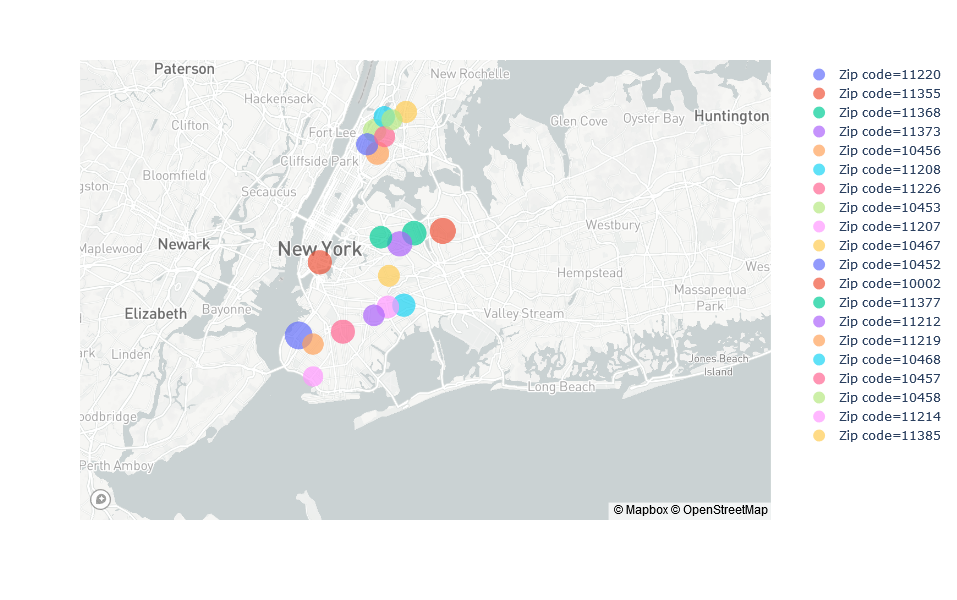

In [168]:
px.scatter_mapbox(
    top_20_poor2016,
    lat="Latitude",
    lon="Longitude",
    size="2011",
    color="Zip code",
)

In [93]:
#column_appended_data.plot.bar(figsize=(20,10))

In [ ]:
column_appended_data.groupby('Zip code').mean()

In [ ]:
column_appended_data.groupby('Zip code')['2011'].apply(list)

In [30]:
df1 = column_appended_data.groupby('Zip code')['2011'].apply(list).reset_index(name='new')
df1

,Zip code,new
0,10001,"[4329, 2659, 1875, 1241, 1921, 1565]"
1,10002,"[25950, 8925, 4008, 2126, 2442, 1087]"
2,10003,"[6733, 5261, 4386, 3059, 5581, 5005]"
3,10004,"[364, 309, 253, 214, 497, 698]"
4,10005,"[908, 859, 762, 524, 1191, 1359]"
5,10006,"[404, 373, 308, 256, 576, 508]"
6,10007,"[526, 351, 327, 215, 638, 1471]"
7,10009,"[11340, 7535, 5169, 2918, 3689, 1429]"
8,10010,"[3360, 2970, 2631, 1926, 3475, 3126]"
9,10011,"[6517, 4878, 4225, 3214, 6113, 5801]"


In [36]:
df2011 = pd.DataFrame(income_2011, columns=['Size of adjusted gross income', 'Number of returns'])
df2011 = df2011.groupby('Size of adjusted gross income').sum()

In [37]:
df2012 = pd.DataFrame(income_2012, columns=['Size of adjusted gross income', 'Number of returns'])
df2012 = df2012.groupby('Size of adjusted gross income').sum()

In [38]:
df2013 = pd.DataFrame(income_2013, columns=['Size of adjusted gross income', 'Number of returns'])
df2013 = df2013.groupby('Size of adjusted gross income').sum()

In [39]:
df2014 = pd.DataFrame(income_2014, columns=['Size of adjusted gross income', 'Number of returns'])
df2014 = df2014.groupby('Size of adjusted gross income').sum()

In [40]:
df2015 = pd.DataFrame(income_2015, columns=['Size of adjusted gross income', 'Number of returns'])
df2015 = df2015.groupby('Size of adjusted gross income').sum()

In [41]:
df2016 = pd.DataFrame(income_2016, columns=['Size of adjusted gross income', 'Number of returns'])
df2016 = df2016.groupby('Size of adjusted gross income').sum()

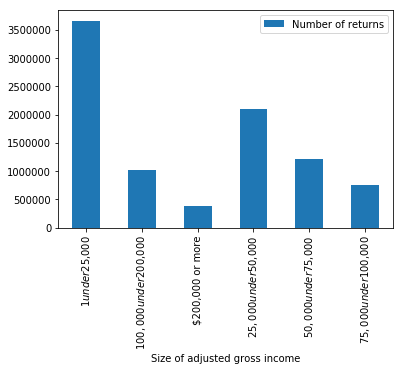

In [53]:
#df2011.plot.bar() * df2012.plot.bar() * df2013.plot.bar() * df2014.plot.bar() * df2015.plot.bar() * df2016.plot.bar()

df2011.plot.bar()

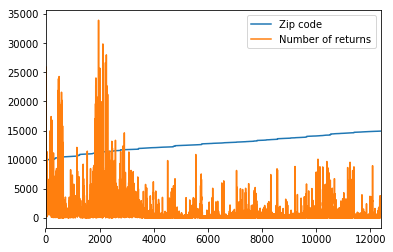

In [54]:
income_2011.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000286F61FAF98>],
      dtype=object)

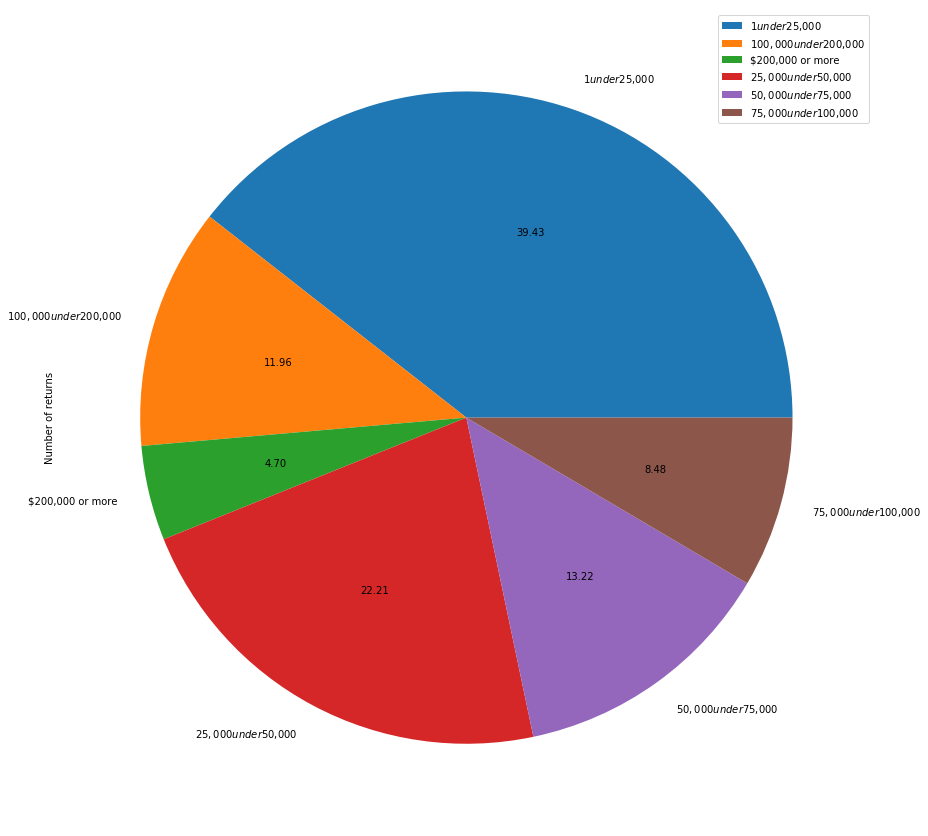

In [34]:
new_df2.plot.pie(subplots=True, figsize=(25, 15), autopct='%.2f')

In [ ]:
#pivot_df = column_appended_data.transpose()

In [ ]:
#pivot_df

In [29]:
new_df3 = pd.pivot_table(income_2011, values='Number of returns', index=['Size of adjusted gross income'], columns=['Zip code'])

In [30]:
new_df4 = new_df3.head(1)

In [31]:
new_df4.plot.bar()